In [2]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
from scipy.stats import norm
class KernelDensity:
    def __init__(self, kernel='gaussian', bandwidth=1.0, domain=(-10,10)):
        """
            kernel    : gaussian|tophat|epanechnikov
            bandwidth : the bandwidth of the kernel
            domain is : a tuple representing the range of x
        """
        if kernel == 'gaussian':
            self.kernel = self._gaussian(bandwidth)
        elif kernel == 'tophat':
            self.kernel = self._tophat(bandwidth)
        else:
            self.kernel = self._epanechnikov(bandwidth)
        
        lo, hi = domain
        self.range = np.linspace(lo, hi, 10000)
    
    def fit(self, x):
        """
            Input:
                x : input data of size N
            Output:
                density : the density estimation given specific kernel
        """
        self._x = x
        density = self.kernel(x)
        self._density = density/sum(density)
        return density

    def plot(self, density=None, x=None, original_pdf=None):
        """
            Plot the estimated density in blue and original density in green if original_pdf is not None
        """
        if density is None:
            density = self._density
        if x is None:
            x = self._x
        plt.fill_between(self.range, density, alpha=0.5)
        plt.plot(x, np.full_like(x, -max(density)*0.05), '|k', markeredgewidth=1)
        y_min, y_max = -max(density)*0.1, max(density)*1.1
        if original_pdf is not None:
            plt.fill_between(self.range, original_pdf, color='g', alpha=0.5)
            y_min, y_max = min(-max(original_pdf)*0.1, y_min), max(max(original_pdf)*1.1, y_max)
        plt.axis([min(self.range), max(self.range), y_min, y_max])

    def _gaussian(self, bandwidth=1.0):
        """
            Gaussian Kernel
        """
        return lambda x: sum(norm(xi,bandwidth).pdf(self.range) for xi in x) 
    
    def _tophat(self, bandwidth=1.0):
        """
            Tophat Kernel
        """
        return lambda x: sum((abs(xi - self.range) < bandwidth/2) for xi in x)

    def _epanechnikov(self, bandwidth=1.0):
        """
            Epanechnikov Kernel
        """
        return lambda x: sum(np.maximum(np.zeros_like(self.range), 3/4 * (1-((self.range-xi)/bandwidth)**2)) for xi in x)

    def generate_data(self, means, variances, weights, num_of_data=1000):
        """
            This function will generate mixture of Gaussian distributions
            Input:
                means       : N numbers representing the mean for each Gaussian dist
                variance    : N numbers representing the variance
                weights     : N numbers representing the weights of mixture
                num_of_data : number of points we are going to generate
            Output:
                pdf    : The distribution of mixture of Gaussian
                points : An array of size num_of_data containing the observation
        """
        means, variances, weights = np.array(means), np.array(variances), np.array(weights)
        assert(sum(weights) - 1 < 1e-5)
        # create PDF
        pdf = np.zeros_like(self.range)
        for m, v, w in zip(means, variances, weights):
            pdf += norm(m, v).pdf(self.range) * w
        pdf = pdf/sum(pdf)

        # generate random variables
        num_per_bucket = np.zeros_like(weights)
        num_per_bucket[1:] = (weights[1:]*num_of_data).astype(int)
        num_per_bucket[0] = num_of_data - sum(num_per_bucket[1:])

        points = []
        for m, v, n in zip(means, variances, num_per_bucket):
            points += list(np.random.normal(m, v, int(n)))

        return pdf, np.array(points)

### Gaussian Kernel with different bandwidth

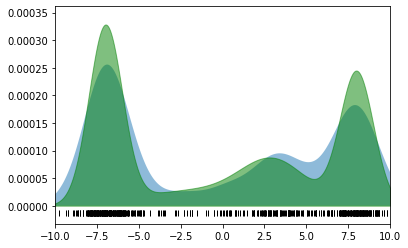

In [80]:
kde = KernelDensity()
pdf, x = kde.generate_data([-7, -2, 3, 8], [1, 3, 2, 1], [0.4, 0.1, 0.2, 0.3], 500)
kde.fit(x)
kde.plot(original_pdf = pdf)

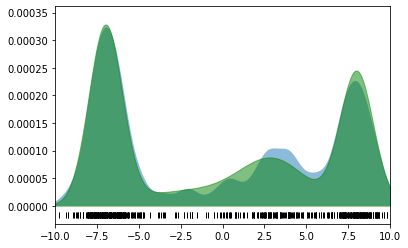

In [81]:
kde = KernelDensity(bandwidth=0.5)
kde.fit(x)
kde.plot(original_pdf = pdf)

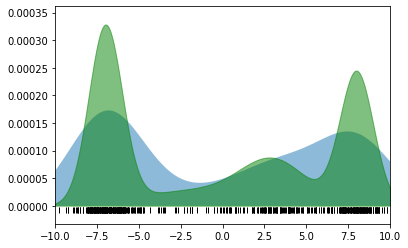

In [82]:
kde = KernelDensity(bandwidth=2)
kde.fit(x)
kde.plot(original_pdf = pdf)

### Tophat Kernel with different bandwidth

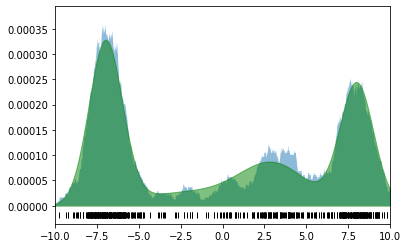

In [83]:
kde = KernelDensity(kernel='tophat')
kde.fit(x)
kde.plot(original_pdf = pdf)

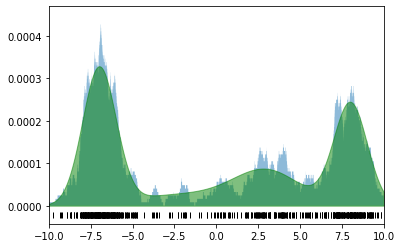

In [84]:
kde = KernelDensity(kernel='tophat', bandwidth=0.5)
kde.fit(x)
kde.plot(original_pdf = pdf)

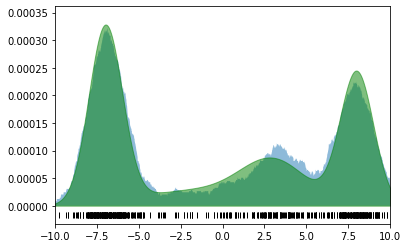

In [85]:
kde = KernelDensity(kernel='tophat', bandwidth=2)
kde.fit(x)
kde.plot(original_pdf = pdf)

### Epanechnikov Kernel with different bandwidth

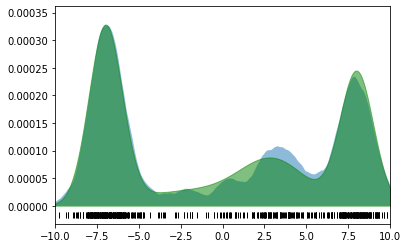

In [86]:
kde = KernelDensity(kernel='epanechnikov')
kde.fit(x)
kde.plot(original_pdf = pdf)

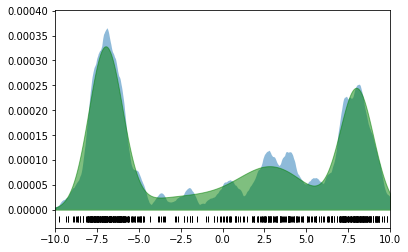

In [87]:
kde = KernelDensity(kernel='epanechnikov',bandwidth=0.5)
kde.fit(x)
kde.plot(original_pdf = pdf)

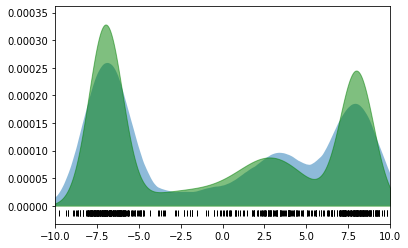

In [88]:
kde = KernelDensity(kernel='epanechnikov',bandwidth=2)
kde.fit(x)
kde.plot(original_pdf = pdf)